Minimum steps required: 14
Coordinate of the path: [(0, 0), (2, 1), (1, 3), (3, 2), (5, 3), (6, 5), (7, 7), (8, 5), (8, 5), (7, 7), (6, 5), (5, 3), (3, 2), (4, 4), (5, 2)]


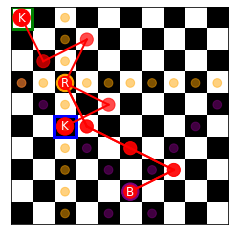

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from collections import deque

class Cell:
    def __init__(self, x=0, y=0, dist=0, parent=None):
        self.x = x
        self.y = y
        self.dist = dist
        self.parent = parent

def Chessboard(n):
    base_row = np.tile([1, 0], (n + 1) // 2)[:n]
    board = np.tile(base_row, (n, 1))
    for i in range(n):
        if i % 2 != 0:
            board[i] = np.roll(board[i], 1)
    return board

def plot_chessboard(ax, board):
    ax.imshow(board, cmap='gray', interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])

def plot_piece(ax, position, color, label):
    ax.add_patch(patches.Circle((position[1], position[0]), 0.4, color=color, fill=True))
    ax.text(position[1], position[0], label, color='white', fontsize=12, ha='center', va='center')

def plot_square(ax, position, color, linewidth):
    ax.add_patch(patches.Rectangle((position[1] - 0.5, position[0] - 0.5), 1, 1, edgecolor=color, facecolor='none', lw=linewidth))

# Funzione per visualizzare le caselle minacciate
def plot_threatened_squares(ax, n, bishopRow, bishopCol, rookRow, rookCol):
    if bishopRow < n and bishopCol < n:
        for i in range(n):
            for j in range(n):
                if abs(bishopRow - i) == abs(bishopCol - j) and (i != bishopRow or j != bishopCol):
                    ax.add_patch(patches.Circle((j, i), 0.2, color='purple', fill=True, alpha=0.5))

    if rookRow < n and rookCol < n:
        for i in range(n):
            if i != rookRow:
                ax.add_patch(patches.Circle((rookCol, i), 0.2, color='orange', fill=True, alpha=0.5))
            if i != rookCol:
                ax.add_patch(patches.Circle((i, rookRow), 0.2, color='orange', fill=True, alpha=0.5))    
    
def is_inside(x, y, n):
    return 0 <= x < n and 0 <= y < n

def isBishopAlive(n, bishopRow, bishopCol):
    if bishopRow < n and bishopCol < n:
        return True
    else:
        return False
    
def isRookAlive(n, rookRow, rookCol):
    if rookRow < n and rookCol < n:
        return True
    else:
        return False

from collections import deque

def bidirectional_search(n, startRow, startCol, endRow, endCol, bishopRow, bishopCol, rookRow, rookCol):
    if startRow == endRow and startCol == endCol:
        return 0, [(startRow, startCol)]

    def get_neighbors(i, j, alive_bishop, alive_rook):
        moves = ((2,1), (1,2), (-1,2), (-2,1), (-2,-1), (-1,-2), (1,-2), (2,-1))
        neighbors = []
        for di, dj in moves:
            cr = i + di
            cc = j + dj
            stillalive_bishop = alive_bishop and (cr != bishopRow or cc != bishopCol)
            stillalive_rook = alive_rook and (cr != rookRow or cc != rookCol)
            if 0 <= cr < n and 0 <= cc < n and (
                    not stillalive_bishop or abs(cr - bishopRow) != abs(cc - bishopCol)) and (
                    not stillalive_rook or (cr != rookRow and cc != rookCol)):
                neighbors.append((cr, cc, stillalive_bishop, stillalive_rook))
        return neighbors

    def bfs(queue, visited, other_visited, forward=True):
        i, j, alive_bishop, alive_rook, steps, path = queue.popleft()
        for neighbor in get_neighbors(i, j, alive_bishop, alive_rook):
            if neighbor not in visited:
                if neighbor in other_visited:
                    other_path = other_visited[neighbor]
                    combined_path = path + [neighbor[:2]] + other_path[::-1] if forward else other_path + [neighbor[:2]] + path[::-1]
                    if check_obstacles(combined_path, bishopRow, bishopCol, rookRow, rookCol):
                        return True, combined_path
                queue.append((*neighbor, steps + 1, path + [neighbor[:2]]))
                visited[neighbor] = path + [neighbor[:2]]
        return False, None

    start_queue = deque([(startRow, startCol, True, True, 0, [(startRow, startCol)])])
    end_queue = deque([(endRow, endCol, True, True, 0, [(endRow, endCol)])])

    start_visited = {(startRow, startCol, True, True): [(startRow, startCol)]}
    end_visited = {(endRow, endCol, True, True): [(endRow, endCol)]}

    while start_queue and end_queue:
        found, path = bfs(start_queue, start_visited, end_visited, forward=True)
        if found:
            return len(path) - 1, path
        found, path = bfs(end_queue, end_visited, start_visited, forward=False)
        if found:
            return len(path) - 1, path

    return -1, None

def check_obstacles(path, bishopRow, bishopCol, rookRow, rookCol):
    bishop_alive = True
    rook_alive = True
    for cr, cc in path:
        if bishop_alive and (cr == bishopRow and cc == bishopCol):
            bishop_alive = False
        if rook_alive and (cr == rookRow and cc == rookCol):
            rook_alive = False
    return not bishop_alive and not rook_alive

def draw_path(ax, path):
    for (i, j) in path:
        ax.add_patch(patches.Circle((j, i), 0.3, color='red', fill=True, alpha=0.7))
    for k in range(len(path) - 1):
        (i1, j1), (i2, j2) = path[k], path[k + 1]
        ax.plot([j1, j2], [i1, i2], color='red', linewidth=2)

# Configurazione e visualizzazione della scacchiera e dei pezzi
n = 10
startRow, startCol = 0, 0
endRow, endCol = 5, 2
bishopRow, bishopCol = 8, 5
rookRow, rookCol = 3, 2

board = Chessboard(n)
fig, ax = plt.subplots()
plot_chessboard(ax, board)
plot_square(ax, (startRow, startCol), 'green', 3)
plot_square(ax, (endRow, endCol), 'blue', 3)
plot_piece(ax, (startRow, startCol), 'red', 'K')
plot_piece(ax, (bishopRow, bishopCol), 'purple', 'B')
plot_piece(ax, (rookRow, rookCol), 'orange', 'R')
plot_piece(ax, (endRow, endCol), 'red', 'K')
plot_threatened_squares(ax, n, bishopRow, bishopCol, rookRow, rookCol)


result = bidirectional_search(n, startRow, startCol, endRow, endCol, bishopRow, bishopCol, rookRow, rookCol)
if result[0] != -1:
    steps, path = result
    draw_path(ax, path)
    print(f"Minimum steps required: {steps}")
    print("Coordinate of the path:", path)
else:
    print("No path found to reach the target.")

plt.show()

**Bidirectional Search**  
Number of steps: 14  
Path found: [(0, 0), (2, 1), (1, 3), (3, 2), (5, 3), (6, 5), (7, 7), (8, 5), (8, 5), (7, 7), (6, 5), (5, 3), (3, 2), (4, 4), (5, 2)]  
*Characteristics:*  
Pros: Potentially faster by exploring from both directions.  
Cons: Combining paths can result in suboptimal paths compared to BFS and A*.  
Obstacle Handling: Ensures obstacles are removed, but the path length may increase due to the need to combine paths from both directions.  

**General Comparison**  
Path Efficiency:  

BFS and A*: Both find the optimal path with 9 steps. A* is more efficient due to heuristic usage.  
DFS: Finds a longer path with 13 steps. Does not guarantee the shortest path.  
Bidirectional Search: Finds a path with 14 steps. Not always optimal due to path combination from both directions.  

**Final Comment**  

BFS: Excellent for finding the shortest path, but may require a lot of memory.  
DFS: Does not guarantee the shortest path and explores longer paths.  
A*: Best balance between execution time and path quality due to heuristic.  
Bidirectional Search: Potentially fast, but path combination can lead to suboptimal solutions.  
In your case, A* appears to be the best algorithm in terms of efficiency and obstacle handling, while BFS is a good alternative for its simplicity and reliability in finding the shortest path. Bidirectional Search, although interesting, might not be the best choice as it can produce longer and more complex paths.